In [31]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

| Code      | Description                        |
|:----------|-----------------------------------:|
| IS-CNG-TJ |Total consumption of natural gas, TJ|
| IS-ING-TJ |Imports of natural gas, TJ          |
| IS-PEL-GWH| Production of electricity - GWh    |
| IS-CEL-GWH| Consumption of electricity - GWh   |
| IS-IEL-GWH| Imports of electricity - GWh       |
| IS-ICO-T  |Imports of crude oil - 1000t        |


In [3]:
FILE_PATH = './data/ei_isen_m__custom_4569965_tabular.tsv'

df = pd.read_csv(FILE_PATH, sep='\t')

df

,"freq,s_adj,indic,geo\TIME_PERIOD",2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12
0,"M,NSA,IS-CEL-GWH,CZ",6352.000,5878.000,6019.000,5492.000,5111.000,4784.000,4821.000,4757.000,5080.000,...,5722.632,5110.323,4811.335,4598.681,4354.947,4494.839,4565.469,4789.209,:,:
1,"M,NSA,IS-CNG-TJ,CZ",47394.000,40149.000,40354.000,27020.000,16660.000,12320.000,12156.000,11648.000,19144.000,...,34813.116,26575.006,15138.554,13159.737,11986.972,11984.760,15476.146,20707.109,29921.442,:
2,"M,NSA,IS-ICO-T,CZ",573.000,627.000,571.000,723.000,685.000,667.000,566.000,687.000,834.000,...,457.000,492.000,655.000,616.000,679.000,643.000,681.000,659.000,:,:
3,"M,NSA,IS-IEL-GWH,CZ",1064.000,865.000,708.000,569.000,507.000,545.000,751.000,592.000,483.000,...,1540.204,1703.391,1546.755,1028.689,1131.935,1042.083,1155.212,1561.309,:,:
4,"M,NSA,IS-ING-TJ,CZ",32578.000,30605.000,33815.000,31546.000,35360.000,34056.000,30857.000,21210.000,22611.000,...,143888.131,140340.250,138435.436,115260.448,68384.022,48865.711,30609.168,49009.822,41209.808,:
5,"M,NSA,IS-PEL-GWH,CZ",:,:,:,:,:,:,:,:,:,...,7575.091,6023.628,5642.074,5997.733,6127.830,6128.448,6375.516,6134.546,:,:


Convert data from wide to long format

,0
0,6352
1,47394
2,573
3,1064
4,32578
...,...
1075,NaN
1076,NaN
1077,NaN
1078,NaN


In [60]:
dfl = pd.melt(df, id_vars=['freq,s_adj,indic,geo\TIME_PERIOD'])
dfl = (
    dfl
    .replace(':', np.nan, regex=True).astype({'value':float})
    .assign('value': lambda df: df['value'].str.extract(r'(\d+|\d*\.\d+)'))
)

dfl

ValueError: could not convert string to float: '34684.000 p'

In [45]:
dfl['value'].astype(float)

ValueError: could not convert string to float: ': '

In [41]:
df_cng = (
    dfl[
        dfl['freq,s_adj,indic,geo\TIME_PERIOD'] == 'M,NSA,IS-CNG-TJ,CZ'
    ]
    .assign(variable = lambda df: pd.to_datetime(df['variable']))
    .astype({'value':'float'})
    .iloc[:,1:]
    .rename(columns={'variable':'date','value':'consumption'})
)
df_cng

ValueError: could not convert string to float: '34684.000 p'

TypeError: 'value' must be an instance of str or bytes, not a float

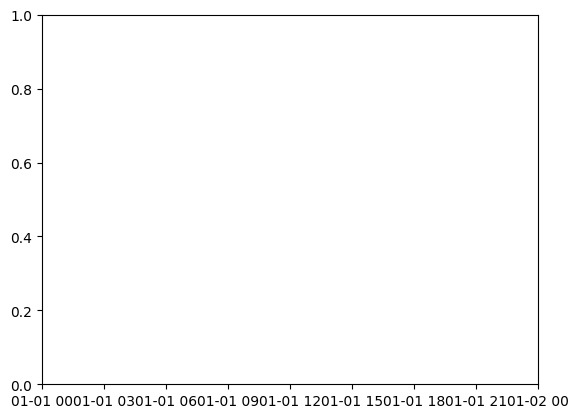

In [34]:
plt.plot(df_cng['variable'], df_cng['value'])